In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("../data/data_segmentees.csv")
df["date_mensuelle"] = pd.to_datetime(df["date_mensuelle"])
df

,date_mensuelle,TARGET,DAYS_BIRTH_disc_int,EXT_SOURCE_2_disc_int,EXT_SOURCE_1_disc_int,AMT_CREDIT_SUM_disc_int,AMT_CREDIT_SUM_DEBT_disc_int,AMT_GOODS_PRICE_disc_int,DAYS_REGISTRATION_disc_int,DAYS_LAST_PHONE_CHANGE_disc_int,...,FLAG_WORK_PHONE,FLAG_PHONE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CODE_GENDER,Score_ind,Classes,date_trimestrielle
0,2013-01-01,0,[-13518;-7489],[0.47;0.85],[0.4;0.96],[0.0;632934.0],[32168.25;43650000.0],[679500.0;4050000.0],[-5742.0;0.0],[-1043.0;0.0],...,zero,un,zero,Cash loans,Y,Y,M,730.650155,5,2013_1
1,2013-01-01,0,[-13518;-7489],[0.47;0.85],[0.4;0.96],[0.0;632934.0],[-1083614.67;32167.93],[40500.0;676278.0],[-5742.0;0.0],[-1043.0;0.0],...,zero,un,zero,Cash loans,N,Y,F,925.696594,6,2013_1
2,2013-01-01,0,[-13518;-7489],[0.47;0.85],[0.12;0.4],[632936.25;198072344.25],[32168.25;43650000.0],[40500.0;676278.0],[-24672.0;-5743.0],[-1043.0;0.0],...,un,zero,zero,Cash loans,Y,N,F,662.538700,5,2013_1
3,2013-01-01,0,[-19757;-13519],[0.47;0.85],[0.12;0.4],[0.0;632934.0],[-1083614.67;32167.93],[679500.0;4050000.0],[-24672.0;-5743.0],[-1043.0;0.0],...,zero,zero,zero,Cash loans,Y,Y,F,693.498452,5,2013_1
4,2013-01-01,0,[-19757;-13519],[0.0;0.15],[0.0;0.12],[0.0;632934.0],[-1083614.67;32167.93],[40500.0;676278.0],[-5742.0;0.0],[-4292.0;-1044.0],...,zero,un,un,Cash loans,N,N,F,362.229102,2,2013_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,2020-04-01,1,[-19757;-13519],[0.47;0.85],[0.4;0.96],[0.0;632934.0],[-1083614.67;32167.93],[679500.0;4050000.0],[-24672.0;-5743.0],[-1043.0;0.0],...,zero,zero,zero,Cash loans,N,Y,F,835.913313,6,2020_2
279996,2020-04-01,1,[-19757;-13519],[0.47;0.85],[0.4;0.96],[0.0;632934.0],[32168.25;43650000.0],[40500.0;676278.0],[-5742.0;0.0],[-4292.0;-1044.0],...,zero,zero,zero,Cash loans,N,N,F,473.684211,3,2020_2
279997,2020-04-01,1,[-13518;-7489],[0.47;0.85],[0.4;0.96],[0.0;632934.0],[32168.25;43650000.0],[40500.0;676278.0],[-5742.0;0.0],[-4292.0;-1044.0],...,zero,zero,zero,Cash loans,Y,Y,F,730.650155,5,2020_2
279998,2020-04-01,1,[-13518;-7489],[0.15;0.47],[0.12;0.4],[0.0;632934.0],[32168.25;43650000.0],[40500.0;676278.0],[-5742.0;0.0],[-4292.0;-1044.0],...,zero,un,un,Cash loans,N,Y,F,222.910217,2,2020_2


# MOC C

In [10]:
resultats = df.groupby("Classes").agg(moyenne_TARGET=("TARGET", "mean")).to_dict()["moyenne_TARGET"]

resultats


{1: 0.2919986144786976,
 2: 0.1863732543377063,
 3: 0.12349742836149889,
 4: 0.08330029514118321,
 5: 0.054224396989601895,
 6: 0.03155841540076113,
 7: 0.02147239263803681}

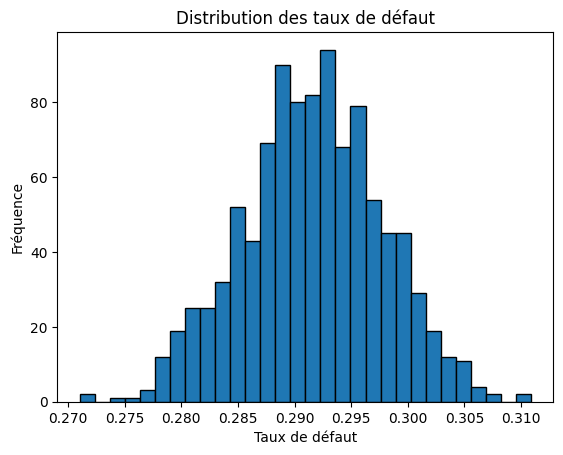

In [11]:
df_classe_1 = df[df['Classes'] == 1]
tx_defaut = []

for _ in range(1000):
    echantillon = df_classe_1["TARGET"].sample(n=len(df_classe_1), replace=True)
    
    tx_defaut.append(echantillon.mean())

deciles_np = np.array(tx_defaut)

plt.hist(tx_defaut, bins=30, edgecolor='k')
plt.xlabel('Taux de défaut')
plt.ylabel('Fréquence')
plt.title('Distribution des taux de défaut')
plt.show()

# MOC A

### missing or materially changed default triggers in historical observations including changed criteria for recognition of materially past due credit obligations;

In [56]:
def trouver_periode_avec_erreur(data, threshold):
    lra = data["TARGET"].mean()
    taux_defaut_trimestriel = data.groupby("date_trimestrielle")["TARGET"].mean()
    difference_abs = abs(taux_defaut_trimestriel - lra)
    periodes_ecarts_significatifs = difference_abs[difference_abs > threshold].index
    return periodes_ecarts_significatifs.values

THRESHOLD = 0.05
trouver_periode_avec_erreur(df, THRESHOLD)

array(['2020_2'], dtype=object)

In [12]:
df["date_mensuelle"] = pd.to_datetime(df["date_mensuelle"])
df['date_trimestrielle'] = df['date_mensuelle'].dt.year.astype(str) + '_' + df['date_mensuelle'].dt.quarter.astype(str)

In [44]:
def calcul_impact_covid_par_classe(data, periode_covid):

    avant_covid = data[data['date_trimestrielle'] < periode_covid]
    pendant_covid = data[data['date_trimestrielle'] == periode_covid]

    taux_defaut_avant_covid = avant_covid.groupby('Classes')['TARGET'].mean()
    taux_defaut_pendant_covid = pendant_covid.groupby('Classes')['TARGET'].mean()

    impact_covid_par_classe = taux_defaut_pendant_covid - taux_defaut_avant_covid
    return impact_covid_par_classe

calcul_impact_covid_par_classe(df, '2020_2')

Classes
1   -0.294601
2   -0.177521
3   -0.118906
4   -0.079669
5   -0.046134
6   -0.029778
7   -0.021685
Name: TARGET, dtype: float64

In [46]:
def calcul_variance_taux_defaut_pendant_covid_par_classe(data_pendant_covid):

    variance_taux_defaut_pendant_covid = data_pendant_covid.groupby('Classes')['TARGET'].var()
    return variance_taux_defaut_pendant_covid


variance_taux_defaut_pendant_covid = calcul_variance_taux_defaut_pendant_covid_par_classe(df[df['date_trimestrielle'] == '2020_2'])
variance_taux_defaut_pendant_covid

Classes
1    0.000000
2    0.010256
3    0.005780
4    0.004415
5    0.008462
6    0.002081
7    0.000000
Name: TARGET, dtype: float64

In [47]:
def simulations_impact(df_impact_covid_par_classe, df_variance_taux_defaut_pendant_covid, n_simulations):

    simulations = pd.DataFrame()

    for classe in df_impact_covid_par_classe.index:
        moyenne_impact = df_impact_covid_par_classe[classe]
        variance_impact = df_variance_taux_defaut_pendant_covid[classe]

        variance_impact = variance_impact if variance_impact > 0 else 0.001

        tirages = np.random.normal(moyenne_impact, np.sqrt(variance_impact), n_simulations)

        simulations[classe] = tirages

    return simulations


n_simulations = 1000
simulations = simulations_impact(calcul_impact_covid_par_classe(df, '2020_2'), calcul_variance_taux_defaut_pendant_covid_par_classe(df[df['date_trimestrielle'] == '2020_2']), n_simulations)
simulations

,1,2,3,4,5,6,7
0,-0.310731,-0.224490,-0.142517,-0.000280,-0.051411,0.060084,0.062631
1,-0.282410,-0.211192,-0.176930,-0.085957,-0.036021,-0.043019,-0.050082
2,-0.305586,-0.258331,-0.107659,-0.040824,0.070153,-0.115759,-0.035624
3,-0.302678,-0.091192,-0.130215,-0.100023,-0.066213,-0.014686,-0.025088
4,-0.334247,-0.115151,-0.143715,-0.001246,-0.073720,-0.003055,0.004955
...,...,...,...,...,...,...,...
995,-0.292678,-0.419197,-0.111283,-0.034316,-0.100931,-0.028633,-0.051756
996,-0.274862,-0.126571,0.093798,-0.016327,-0.029895,-0.072578,-0.023893
997,-0.343763,-0.243793,-0.270487,-0.193985,-0.108097,-0.078842,-0.009749
998,-0.323244,-0.269877,-0.073632,-0.174395,0.086647,0.052357,-0.012698


In [48]:
moyenne_empirique = simulations.mean()
percentile_90 = simulations.quantile(0.90)

difference = percentile_90 - moyenne_empirique
difference

1    0.037537
2    0.132783
3    0.096890
4    0.082689
5    0.117442
6    0.063199
7    0.038228
dtype: float64